In [3]:
import pandas as pd
import numpy as np
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.models import Model, Sequential, load_model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, GlobalAveragePooling2D,Activation,Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
data_dir=r"dataset/rice_plant_lacks_nutrients"
rice=[]
for file in os.listdir(data_dir):
    rice+=[file]
print(rice)
print(len(rice))

['Nitrogen(N)', 'Phosphorus(P)', 'Potassium(K)']
3


In [4]:
img_height,img_width=224,224
batch_size=20
train_datagen = ImageDataGenerator(rescale=1./255,validation_split=0.3)
train_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='training')
test_generator = train_datagen.flow_from_directory(data_dir,
                                                target_size=(img_height,img_width),
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                subset='validation')

Found 811 images belonging to 3 classes.
Found 345 images belonging to 3 classes.


In [5]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='Same', activation='relu', input_shape=(img_height,img_width, 3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Conv2D(filters=96, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters=96, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(3, activation="softmax"))

model.summary()

C:\Users\yagne\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 56, 56, 96)          │          55,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 28, 28, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 96)          │          83,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 18816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       9,634,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,793,667 (37.36 MB)

 Trainable params: 9,793,667 (37.36 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(optimizer='Adam',loss="categorical_crossentropy",metrics=["accuracy"])
hist=model.fit(train_generator,epochs=20,validation_data=test_generator,verbose=1)

C:\Users\yagne\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.3190 - loss: 1.2927 - val_accuracy: 0.5768 - val_loss: 0.9863
Epoch 2/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 42s 1s/step - accuracy: 0.6681 - loss: 0.7550 - val_accuracy: 0.6957 - val_loss: 0.7937
Epoch 3/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.8027 - loss: 0.5130 - val_accuracy: 0.6899 - val_loss: 0.7421
Epoch 4/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.7782 - loss: 0.5523 - val_accuracy: 0.6609 - val_loss: 0.8997
Epoch 5/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.8521 - loss: 0.3660 - val_accuracy: 0.7159 - val_loss: 0.8028
Epoch 6/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - accuracy: 0.8473 - loss: 0.4425 - val_accuracy: 0.7072 - val_loss: 0.9271
Epoch 7/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 40s 974ms/step - accuracy: 0.8420 - loss: 0.3566 - val_accuracy: 0.6725 - val_loss: 1.0780
Epoch 8/20
41/41 ━━━━━━━━━━━━━━━━━━━━ 40s 982ms/step - accuracy: 0.8803 - loss: 0.3272 - val_accuracy: 0.7043 - val

In [7]:

model.evaluate(test_generator)
model.save("MobileNet.h5")

18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 617ms/step - accuracy: 0.7052 - loss: 1.3459


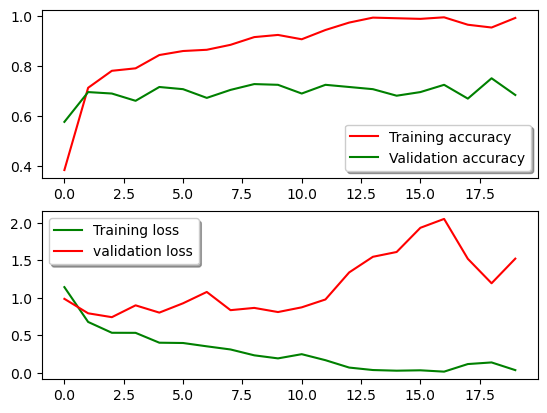

In [10]:
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['accuracy'], color='r', label="Training accuracy")
ax[0].plot(hist.history['val_accuracy'], color='g',label="Validation accuracy")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['loss'], color='g', label="Training loss")
ax[1].plot(hist.history['val_loss'], color='r', label="validation loss")
legend = ax[1].legend(loc='best', shadow=True)

In [3]:
import h5py
file = h5py.File('MobileNet.h5', 'r')

# List all groups and datasets in the file
def print_structure(name, obj):
    if isinstance(obj, h5py.Group):
        print(f"Group: {name}")
    elif isinstance(obj, h5py.Dataset):
        print(f"Dataset: {name}, Shape: {obj.shape}")

file.visititems(print_structure)

# Close the file after inspection
file.close()


Group: model_weights
Group: model_weights/activation
Group: model_weights/conv2d
Group: model_weights/conv2d/sequential
Group: model_weights/conv2d/sequential/conv2d
Dataset: model_weights/conv2d/sequential/conv2d/bias, Shape: (32,)
Dataset: model_weights/conv2d/sequential/conv2d/kernel, Shape: (3, 3, 3, 32)
Group: model_weights/conv2d_1
Group: model_weights/conv2d_1/sequential
Group: model_weights/conv2d_1/sequential/conv2d_1
Dataset: model_weights/conv2d_1/sequential/conv2d_1/bias, Shape: (64,)
Dataset: model_weights/conv2d_1/sequential/conv2d_1/kernel, Shape: (3, 3, 32, 64)
Group: model_weights/conv2d_2
Group: model_weights/conv2d_2/sequential
Group: model_weights/conv2d_2/sequential/conv2d_2
Dataset: model_weights/conv2d_2/sequential/conv2d_2/bias, Shape: (96,)
Dataset: model_weights/conv2d_2/sequential/conv2d_2/kernel, Shape: (3, 3, 64, 96)
Group: model_weights/conv2d_3
Group: model_weights/conv2d_3/sequential
Group: model_weights/conv2d_3/sequential/conv2d_3
Dataset: model_weight